# Web Scraping Covid-19 Data

Web Scraping example 
*(Use the `sideprojectenv` kernel)*

**How it works:**
1. Request for a response from the webpage
2. Parse and extract with the help of Beautiful soup and lxml
3. Download and export the data with pandas into excel

**Required modules:**
- `pip install pandas`
- `pip install requests`
- `pip install lxml`
- `pip install bs4`

## Requests

In [1]:
# Import the necessary module!
import requests

# Make request from webpage
url ="https://www.worldometers.info/coronavirus/country/us/"
result = requests.get(url)


## Import bs4


In [2]:
# Import the necessary module!
import bs4

# Create soup variable
# pass on two things here, result.text string and lxml as a string
soup = bs4.BeautifulSoup(result.text, 'lxml')

#soup

## Extracting the data

### Finding the div

In [3]:
# Find-all method
cases = soup.find_all('div', class_ = 'maincounter-number')
cases

[<div class="maincounter-number">
 <span style="color:#aaa">111,820,082        </span>
 </div>,
 <div class="maincounter-number">
 <span>1,219,487</span>
 </div>,
 <div class="maincounter-number" style="color:#8ACA2B ">
 <span>109,814,428</span>
 </div>]

## Storing the data

In [4]:
# Python list
data = []

# Find the span and get data from it
for i in cases:
    # We will use span to fetch data from div
    span = i .find('span')
    # We will use span.string to get the numbers.
    data.append(span.string)
    
data        

['111,820,082        ', '1,219,487', '109,814,428']

## Exporting the data

In [5]:
# Import the necessary module!
import pandas as pd

# Create a dataframe
df = pd.DataFrame({'CoronaData': data})

df

,CoronaData
0,"111,820,082"
1,"1,219,487"
2,"109,814,428"


## Naming the columns


In [6]:
# Naming the columns
df.index = ["Total Cases", "Total Deaths", "Total Recovered"]

df

,CoronaData
Total Cases,"111,820,082"
Total Deaths,"1,219,487"
Total Recovered,"109,814,428"


# Additional Things To Do

- **Visualize the data:**  
  Use `matplotlib` AND `Plotly` to create charts and graphs.


- **Export the data:**  
  Save your DataFrame to Excel or CSV for sharing or further analysis.

- **Display in HTML:**  
  Render the DataFrame as a styled HTML table for web or notebook presentation.

**Required modules:**
- `pip install matplotlib`
- `pip install plotly`


## Visualising data with Matplotlib

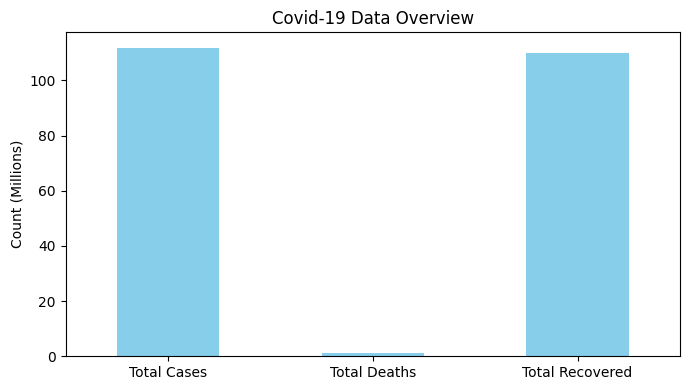

In [7]:
# Clean and convert data to millions for plotting
df_plot = df.copy()
df_plot['CoronaData'] = (
    df_plot['CoronaData']
    .str.replace(',', '')
    .str.strip()
    .astype(int) / 1_000_000  # Convert to millions
)

import matplotlib.pyplot as plt

# Plot the data with labels and style
ax = df_plot.plot(
    kind='bar',
    legend=False,
    color='skyblue',
    figsize=(7, 4)
)
ax.set_ylabel('Count (Millions)')
ax.set_title('Covid-19 Data Overview')
ax.set_xticklabels(df_plot.index, rotation=0)
plt.tight_layout()
plt.show()

## Visualising data with plotly

In [8]:
# Clean and convert data to millions for plotting
df_plot = df.copy()
df_plot['CoronaData'] = (
    df_plot['CoronaData']
    .str.replace(',', '')
    .str.strip()
    .astype(int) / 1_000_000  # Convert to millions
)

import plotly.graph_objects as go

fig = go.Figure(
    go.Bar(
        x=df_plot.index,
        y=df_plot['CoronaData'],
        marker_color='skyblue'
    )
)
fig.update_layout( 
    title='Covid-19 Data Overview',
    yaxis_title='Count (Millions)',
    xaxis_title='Category',
    template='plotly_white'
)

## Exporting data to CSV or Excel

In [9]:
import ipywidgets as widgets
from IPython.display import display

def export_csv(b):
    df.to_csv('covid19_data.csv')
    print("Data exported to covid19_data.csv")

def export_excel(b):
    df.to_excel('covid19_data.xlsx')
    print("Data exported to covid19_data.xlsx")

csv_button = widgets.Button(description="Export to CSV", button_style='success')
excel_button = widgets.Button(description="Export to Excel", button_style='info')

csv_button.on_click(export_csv)
excel_button.on_click(export_excel)

display(csv_button, excel_button)

Button(button_style='success', description='Export to CSV', style=ButtonStyle())

Button(button_style='info', description='Export to Excel', style=ButtonStyle())

## Display in HTML

In [10]:
# Display a styled HTML table for web/notebook presentation
styled_df = df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#4F81BD'), ('color', 'white'), ('font-size', '14px')]
    },
    {
        'selector': 'td',
        'props': [('background-color', '#DCE6F1'), ('color', 'black'),('font-size', '13px')]
    }]
).set_properties(**{'text-align': 'center'}).set_caption("Covid-19 Data (Styled Table)")

styled_df

,CoronaData
Total Cases,"111,820,082"
Total Deaths,"1,219,487"
Total Recovered,"109,814,428"
